<a href="https://colab.research.google.com/github/arturszaro/Data_Science_Bootcamp/blob/main/Predictions_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


#Trend
# from statsmodels.tsa.seasonal import seasonal_decompose
# results = seasonal_decompose(df['Close'])
# results.plot()

In [5]:
from pandas._testing.compat import DataFrame
import numpy as np

import pandas_datareader.data as web
import datetime

#get data
df = web.DataReader(name='AMZN', data_source='stooq')
df = df[['Close']].head(500)
df.sort_index(inplace=True)
df.head()
#split
split = int(len(df)*0.8)
train = df.iloc[:split]
test = df.iloc[split:]


In [6]:
df.head()

,Close
Date,
2020-10-02,156.250
2020-10-05,159.960
2020-10-06,154.998
2020-10-07,159.784
2020-10-08,159.528


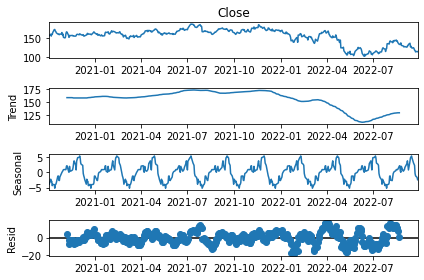

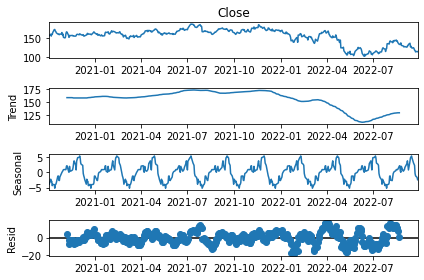

In [7]:
#Trend
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Close'],period = 50)
results.plot()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


scaler.fit(train)

MinMaxScaler()

In [9]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [10]:
scaled_train[:10]

array([[0.51344759],
       [0.57298286],
       [0.49335644],
       [0.57015855],
       [0.56605045],
       [0.64314141],
       [0.76853457],
       [0.76911227],
       [0.70498748],
       [0.68486424]])

In [11]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [12]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [13]:
X,y = generator[1]

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [15]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss='mse')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(generator, epochs=20)

Epoch 1/20
388/388 [==============================] - 3s 8ms/step - loss: 0.0047
Epoch 2/20
388/388 [==============================] - 3s 7ms/step - loss: 0.0046
Epoch 3/20
388/388 [==============================] - 2s 6ms/step - loss: 0.0045
Epoch 4/20
388/388 [==============================] - 2s 6ms/step - loss: 0.0036
Epoch 5/20
388/388 [==============================] - 2s 6ms/step - loss: 0.0039
Epoch 6/20
388/388 [==============================] - 2s 6ms/step - loss: 0.0036
Epoch 7/20
388/388 [==============================] - 3s 7ms/step - loss: 0.0035
Epoch 8/20
388/388 [==============================] - 2s 6ms/step - loss: 0.0035
Epoch 9/20
388/388 [==============================] - 2s 6ms/step - loss: 0.0033
Epoch 10/20
388/388 [==============================] - 3s 6ms/step - loss: 0.0031
Epoch 11/20
388/388 [==============================] - 2s 6ms/step - loss: 0.0033
Epoch 12/20
388/388 [==============================] - 3s 8ms/step - loss: 0.0032
Epoch 13/20
388/388 [====

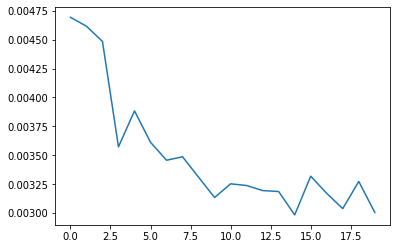

In [19]:
import matplotlib.pyplot as plt
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [20]:
last_train_batch = scaled_train[-n_input:]

In [21]:
last_train_batch = last_train_batch.reshape(1, n_input, n_features)

In [22]:
model.predict(last_train_batch)

array([[0.02004227]], dtype=float32)

In [23]:
scaled_test[0]

array([-0.12592272])

In [24]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

In [25]:
test_predictions

[array([0.02004227], dtype=float32),
 array([0.02216044], dtype=float32),
 array([0.02700178], dtype=float32),
 array([0.03332592], dtype=float32),
 array([0.04095423], dtype=float32),
 array([0.04939966], dtype=float32),
 array([0.05831562], dtype=float32),
 array([0.06775088], dtype=float32),
 array([0.07773687], dtype=float32),
 array([0.08696533], dtype=float32),
 array([0.09568607], dtype=float32),
 array([0.10384437], dtype=float32),
 array([0.11148407], dtype=float32),
 array([0.11856616], dtype=float32),
 array([0.12509023], dtype=float32),
 array([0.13105914], dtype=float32),
 array([0.13650016], dtype=float32),
 array([0.14147514], dtype=float32),
 array([0.14601147], dtype=float32),
 array([0.1501557], dtype=float32),
 array([0.15395397], dtype=float32),
 array([0.15743208], dtype=float32),
 array([0.1606133], dtype=float32),
 array([0.16352177], dtype=float32),
 array([0.16617858], dtype=float32),
 array([0.16860303], dtype=float32),
 array([0.1708068], dtype=float32),
 arr

In [26]:
true_predictions = scaler.inverse_transform(test_predictions)

In [27]:
import pandas as pd
pd.options.mode.chained_assignment = None
test['Predictions'] = true_predictions

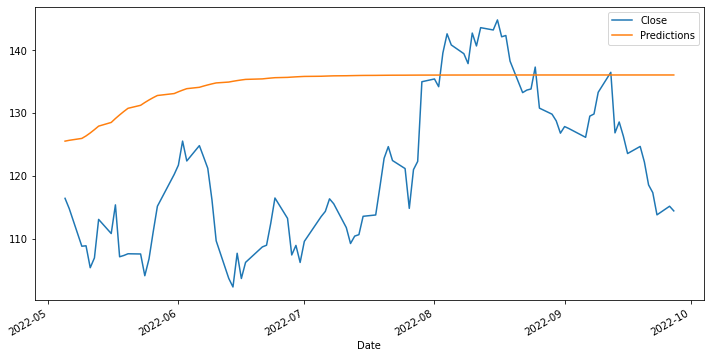

In [28]:
test.plot(figsize=(12,6))